In [1]:
import numpy as np
from scipy import sparse
import re
import matplotlib
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.cm as cmx
import matplotlib.colors as colors
from sklearn.feature_selection import SelectFromModel
import datetime as dt
import math
from sklearn.linear_model import Lasso as Lasso_Reg
import numpy as np 
import sklearn.preprocessing as Preprocessing
from sklearn.preprocessing import StandardScaler as Standardize
%matplotlib inline
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge as Ridge_Reg
from scipy.stats.mstats import winsorize
from sklearn.grid_search import GridSearchCV

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
ny = pd.read_csv('/Users/sarahqin/Downloads/cleaned_with_nlp_listings.csv')

In [3]:
ny.columns

Index(['id', 'host_response_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'is_location_exact', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calcu

In [7]:
import numpy as np
from sklearn import preprocessing

def encode_categorical(array):
    if not array.dtype == np.dtype('float64'):
        return preprocessing.LabelEncoder().fit_transform(array) 
    else:
        return array
    
temp_data = ny.copy()
temp_data = temp_data.dropna(axis=0)
temp_data = temp_data.apply(encode_categorical)


corr_matrix = temp_data.corr()
corr_matrix

,id,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,...,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5
id,1.000000,-0.001389,-0.007345,0.008525,0.008525,0.001869,-0.400951,-0.143192,0.028114,0.034585,...,-0.056370,0.101188,-0.035157,-0.109591,0.047863,0.119865,0.073141,-0.077514,0.059477,-0.218970
host_response_rate,-0.001389,1.000000,0.101358,-0.020206,-0.020206,0.006808,0.004765,0.022331,0.007047,0.004135,...,-0.008243,-0.003878,0.031280,-0.021537,-0.069249,0.003692,0.050116,0.005465,-0.003444,-0.008954
host_is_superhost,-0.007345,0.101358,1.000000,-0.031140,-0.031140,0.008152,0.003929,0.005716,0.059705,0.002197,...,0.014275,-0.002318,0.054880,0.066491,-0.158865,0.024835,0.105693,0.021291,-0.044307,-0.005343
host_listings_count,0.008525,-0.020206,-0.031140,1.000000,1.000000,0.003153,-0.040888,0.013433,0.005980,0.009163,...,-0.005169,0.010514,-0.035383,0.061288,-0.017890,0.017289,-0.016760,-0.013139,0.021396,0.013095
host_total_listings_count,0.008525,-0.020206,-0.031140,1.000000,1.000000,0.003153,-0.040888,0.013433,0.005980,0.009163,...,-0.005169,0.010514,-0.035383,0.061288,-0.017890,0.017289,-0.016760,-0.013139,0.021396,0.013095
host_has_profile_pic,0.001869,0.006808,0.008152,0.003153,0.003153,1.000000,0.037037,-0.004685,0.006207,0.004049,...,-0.005025,0.008691,0.007722,0.001230,0.000358,-0.014634,-0.000213,-0.000371,0.004568,0.009359
host_identity_verified,-0.400951,0.004765,0.003929,-0.040888,-0.040888,0.037037,1.000000,0.061629,-0.044373,-0.044817,...,0.024623,-0.042900,0.052044,0.029257,-0.025576,-0.056681,-0.043024,0.029238,-0.053227,0.134559
is_location_exact,-0.143192,0.022331,0.005716,0.013433,0.013433,-0.004685,0.061629,1.000000,0.023934,0.027182,...,0.005546,-0.005596,0.005711,0.011756,-0.011269,-0.021889,-0.025528,0.010174,-0.008696,0.056954
accommodates,0.028114,0.007047,0.059705,0.005980,0.005980,0.006207,-0.044373,0.023934,1.000000,0.350168,...,-0.033152,0.055898,-0.034001,0.146280,-0.056375,0.028131,-0.038403,0.074728,-0.035957,0.050908
bathrooms,0.034585,0.004135,0.002197,0.009163,0.009163,0.004049,-0.044817,0.027182,0.350168,1.000000,...,-0.019057,0.025893,-0.037757,0.076433,-0.015291,-0.007772,0.074994,0.006983,0.003452,-0.075704


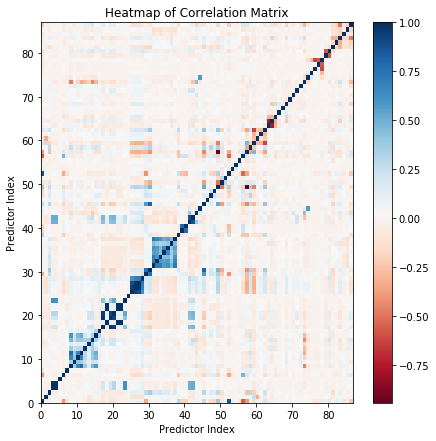

In [8]:
plt.figure(figsize=(7, 7))
plt.pcolor(corr_matrix, cmap='RdBu')
plt.xlabel('Predictor Index')
plt.ylabel('Predictor Index')
plt.title('Heatmap of Correlation Matrix')
plt.colorbar()

plt.show()